<a href="https://colab.research.google.com/github/zcoronado/global-warming-analytics/blob/main/FbProphet_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from google.colab import files
uploaded = files.upload()

Saving San_Diego_Ca.csv to San_Diego_Ca.csv


In [80]:
# import numpy, pandas for data manipulation
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt

In [81]:
weather_data = pd.read_csv('San_Diego_Ca.csv',parse_dates=['date'])
weather_data

,Station_ID,date,Monthly_MSL,Monthly_Avg_Temp
0,"San Diego, CA",1979-01-01,-0.002,56.8
1,"San Diego, CA",1979-02-01,-0.040,56.9
2,"San Diego, CA",1979-03-01,-0.039,60.1
3,"San Diego, CA",1979-04-01,-0.040,63.4
4,"San Diego, CA",1979-05-01,-0.047,65.5
...,...,...,...,...
505,"San Diego, CA",2021-02-01,0.028,58.9
506,"San Diego, CA",2021-03-01,0.026,58.9
507,"San Diego, CA",2021-04-01,0.092,63.7
508,"San Diego, CA",2021-05-01,0.102,64.8


In [82]:
# Check Dataset shape
print(weather_data.shape)

# select the data and temperature columns
temp_df = weather_data[['date', 'Monthly_Avg_Temp']]

# rename column for fbprophet
temp_df = temp_df.rename(columns={'date':'ds','Monthly_Avg_Temp':'y'})

temp_df.head(10)

(510, 4)


,ds,y
0,1979-01-01,56.8
1,1979-02-01,56.9
2,1979-03-01,60.1
3,1979-04-01,63.4
4,1979-05-01,65.5
5,1979-06-01,70.2
6,1979-07-01,71.7
7,1979-08-01,73.8
8,1979-09-01,76.2
9,1979-10-01,68.6


In [83]:
temp_df['ds'] = pd.to_datetime(temp_df['ds'])
temp_df

,ds,y
0,1979-01-01,56.8
1,1979-02-01,56.9
2,1979-03-01,60.1
3,1979-04-01,63.4
4,1979-05-01,65.5
...,...,...
505,2021-02-01,58.9
506,2021-03-01,58.9
507,2021-04-01,63.7
508,2021-05-01,64.8


In [84]:
# select the subset datea from 2015 - 2019
# mask = (temp_df['ds'] >= '2018-01-01') & (temp_df['ds'] <= '2021-05-04')
# temp_df = temp_df.loc[mask]

# iunpect first 5 rows and loast 5 rows of the data
from IPython.display import display
display(temp_df.head(5))
display(temp_df.tail(5))

,ds,y
0,1979-01-01,56.8
1,1979-02-01,56.9
2,1979-03-01,60.1
3,1979-04-01,63.4
4,1979-05-01,65.5


,ds,y
505,2021-02-01,58.9
506,2021-03-01,58.9
507,2021-04-01,63.7
508,2021-05-01,64.8
509,2021-06-01,68.2


In [85]:
# describe
temp_df.describe()

,y
count,510.000000
mean,64.487255
std,5.746000
min,53.900000
25%,59.925000
50%,63.900000
75%,68.800000
max,96.800000


In [86]:
# Output the max and min temps
print(temp_df.loc[temp_df['y'] == temp_df['y'].max()])
print(temp_df.loc[temp_df['y'] == temp_df['y'].min()])

           ds     y
80 1985-09-01  96.8
            ds     y
107 1987-12-01  53.9


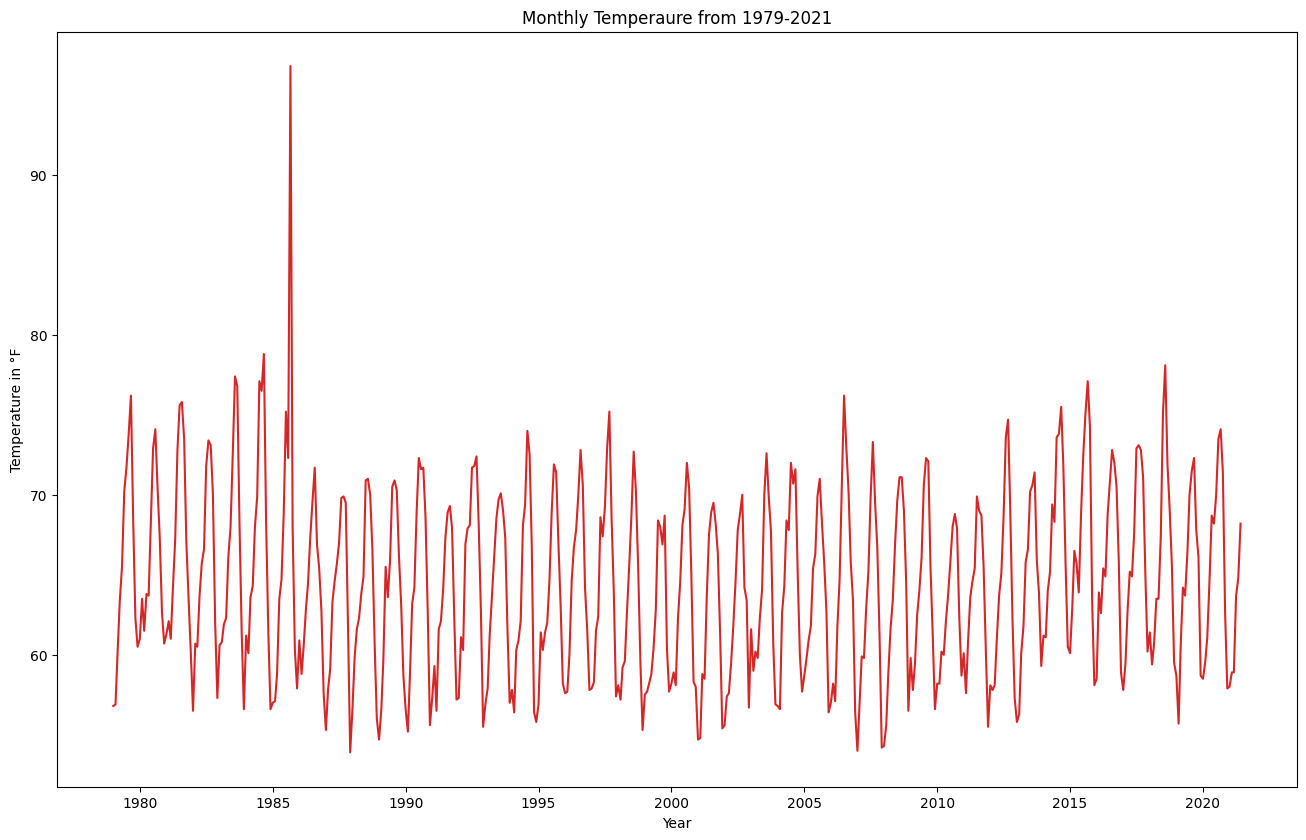

In [87]:
# plot the monthly temperature change
plt.figure(figsize=(16,10), dpi=100)
plt.plot(temp_df.ds, temp_df.y, color='tab:red')
plt.gca().set(title='Monthly Temperaure from 1979-2021', xlabel='Year', ylabel='Temperature in °F')
plt.show()

In [88]:
# import Prophet
from fbprophet import Prophet

In [89]:
# Initialize Model
model = Prophet(seasonality_mode='multiplicative', mcmc_samples=200)
model.fit(temp_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [90]:
model.component_modes

{'additive': ['additive_terms', 'extra_regressors_additive'],
 'multiplicative': ['yearly',
  'multiplicative_terms',
  'extra_regressors_multiplicative',
  'holidays']}

In [91]:
# Create future dates of 365 days
future_dates = model.make_future_dataframe(periods=120, freq='MS')

In [92]:
future_dates.tail()

,ds
625,2031-02-01
626,2031-03-01
627,2031-04-01
628,2031-05-01
629,2031-06-01


In [93]:
prediction = model.predict(future_dates)

In [94]:
#prediction.head()

In [95]:
#prediction.tail()

In [96]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
625,2031-02-01,62.151953,58.107672,66.023892
626,2031-03-01,63.724265,59.568059,67.695396
627,2031-04-01,65.978781,61.677735,70.058866
628,2031-05-01,67.859778,63.827866,72.207135
629,2031-06-01,70.924228,66.519592,75.499257


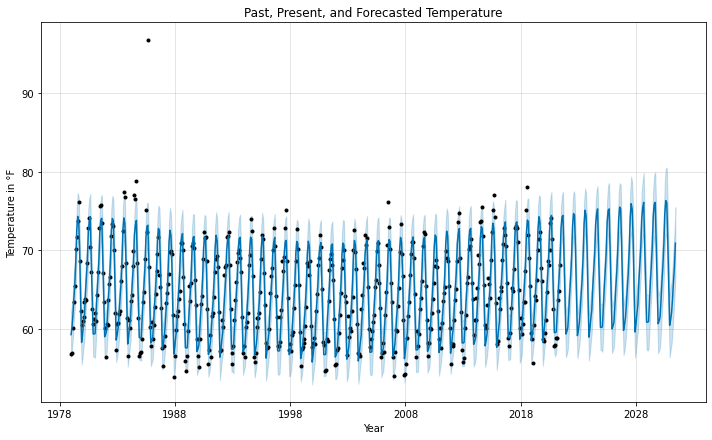

In [97]:
### plot the predicted projection
model.plot(prediction)
plt.gca().set(title='Past, Present, and Forecasted Temperature', xlabel='Year', ylabel='Temperature in °F');

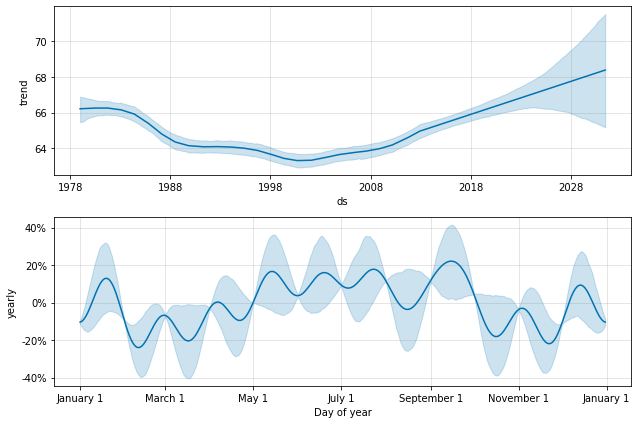

In [98]:
# plot trend, yearly seasonality of the time series. 
model.plot_components(prediction);

In [99]:
from fbprophet.plot import plot_plotly, plot_components_plotly

### plot the predicted projection - interactive

plot_plotly(model, prediction)

In [100]:
# plot trend, yearly seasonality of the time series. - interactiveb

plot_components_plotly(model, prediction)

In [101]:
from fbprophet.diagnostics import cross_validation
# Creat cross validation

cutoffs = pd.date_range(start='2018-01-01', end='2020-01-01', freq='3MS')

cross_val = cross_validation(model, horizon='90 days', cutoffs=cutoffs)
cross_val.head()

  0%|          | 0/9 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-02-01,60.868867,57.840381,63.609310,59.4,2018-01-01
1,2018-03-01,62.884472,60.214343,65.738808,60.7,2018-01-01
2,2018-04-01,65.140828,62.117271,67.847053,63.5,2018-01-01
3,2018-05-01,67.098491,63.998124,69.843442,63.5,2018-04-01
4,2018-06-01,69.829120,66.991202,72.663244,67.4,2018-04-01


In [102]:
# obtain performance metrics
from fbprophet.diagnostics import performance_metrics
p_metrics = performance_metrics(cross_val)
p_metrics.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,30 days,11.346841,3.368507,3.360058,0.052837,0.052837,0.000000
1,31 days,9.609292,3.099886,2.701864,0.042444,0.032452,0.571429
2,59 days,5.305756,2.303423,2.300499,0.037965,0.037965,1.000000
3,60 days,3.487009,1.867353,1.796055,0.029552,0.028564,1.000000
4,61 days,4.491896,2.119409,1.500396,0.022527,0.018511,0.750000


Coverage = the difference between the yhat_lower and yhat_upper


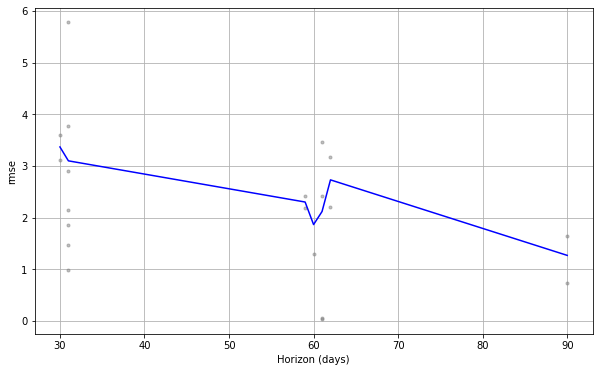

In [103]:
# plot RMSE graph

from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cross_val, metric='rmse')


In [ ]:
import json
from fbprophet.serialize import model_to_json, model_from_json

with open('weather_prophet_model.json', 'w') as fout:
    json.dump(model_to_json(model), fout)  # Save model

# with open('serialized_model.json', 'r') as fin:
#     m = model_from_json(json.load(fin))  # Load model